# Usando outros gráficos no Power BI com Python

### Temos 2 bibliotecas muito usadas no Python para gráficos, além da matplotlib que já conhecemos:

- Plotly
- Seaborn

Você pode usar as duas que são muito boas. Vamos usar nesse exemplo a Seaborn

### Passo 1: Recriando os dataframes que estão no Power BI

In [1]:
import pandas as pd
import os

# importando os arquivos
# sempre usar o caminho COMPLETO para o Power BI, pois inclusive ele se encontra em pasta diferente do que a do script python
caminho_padrao = r'C:\Users\jharbes\Documents\GitHub\hashtagPython\032-pythonDashboards-dash-python-powerBi\06-pythonParaCriarGraficosNoPowerBi'
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Vendas - 2017.csv'), sep=';')
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Cadastro Produtos.csv'), sep=';')
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Lojas.csv'), sep=';')
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Clientes.csv'), sep=';')

# limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome da Marca']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

# mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})

# atentar que o comando display NAO existe para o Power BI
display(vendas_df)

# todos os dataframes presentes (clientes_df, produtos_df, lojas_df e vendas_df estarao presentes no Power BI e lá poderemos decidir quais delas vamos importar)



# estamos filtrando tres lojas de toda a tabela, apenas as lojas que tiverem o 'ID Loja' =86 306 e 172
# ao transferir para o PowerBI o script teremos que a tabela vendas_df estara com o nome 'dataset' que foi colocado pelo PowerBI

# Caso haja problema na data na hora de execução do script python provavelmente teremos que converte-la para texto e depois retornarmos o tipo dela para data
tres_lojas_df=vendas_df[vendas_df['ID Loja'].isin([86,306,172])]
tres_lojas_df['Data da Venda'] = pd.to_datetime(tres_lojas_df['Data da Venda'], format='%d/%m/%Y')
display(tres_lojas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome da Marca,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,Wide World Importers,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso,Loja Contoso New York No.1,anne5@adventure-works.com


C:\Users\jharbes\AppData\Local\Temp\ipykernel_14484\300608440.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tres_lojas_df['Data da Venda'] = pd.to_datetime(tres_lojas_df['Data da Venda'], format='%d/%m/%Y')


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome da Marca,Nome da Loja,E-mail do Cliente
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,2017-11-23,23/11/2017,0,306,235,10,6825,8,0,Litware,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,2017-03-20,21/03/2017,1,172,376,2,6825,9,0,Adventure Works,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,2017-05-21,22/05/2017,1,86,981,1,21344,10,0,A. Datum,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,2017-08-18,18/08/2017,0,306,1621,9,21344,4,0,Contoso,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,2017-06-08,11/06/2017,3,172,1287,1,559,5,0,Contoso,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,2017-09-17,23/09/2017,6,172,1236,3,13331,6,0,Fabrikam,Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,2017-10-18,19/10/2017,1,172,1243,1,3459,5,0,Fabrikam,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,2017-10-30,02/11/2017,3,172,937,1,341,10,0,Southridge Video,Loja Contoso Hartford,mpadfield9g@usnews.com


### Passo 2: Vamos agora criar um gráfico de linha para comparar as Vendas das 3 Lojas

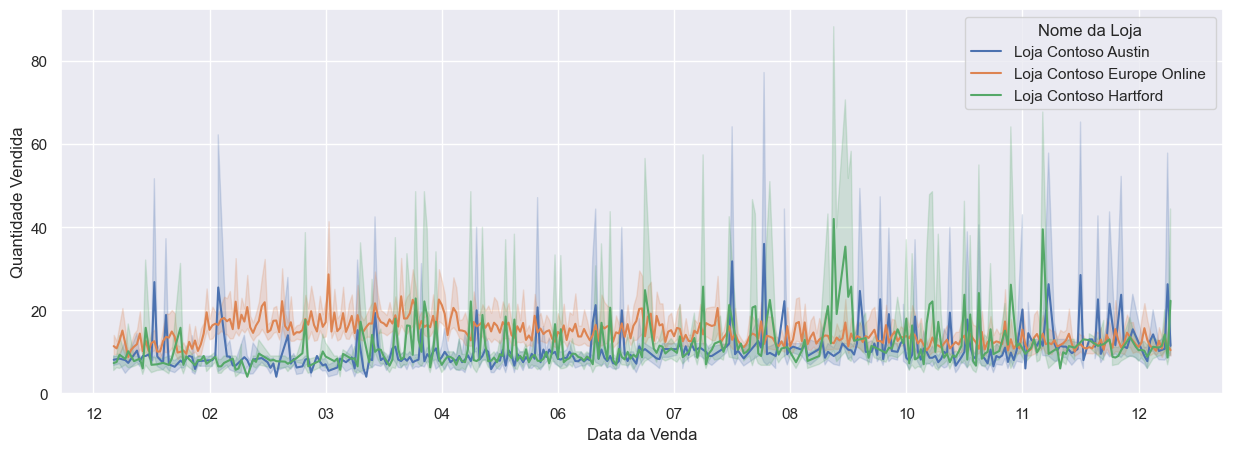

In [3]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

sns.set_theme(style="darkgrid")

# codigo abaixo para usar no PowerBI (podemos usar tambem em outros locais) para aumentar o tamanho do grafico
fig,ax=plt.subplots(figsize=(15,5))


# editando eixo

# vamos alterar a formatacao da data do eixo x para que haja apenas o mes de forma a ficar mais legivel
ax.xaxis.set_major_formatter(DateFormatter('%m'))

# vamos editar o ax para que o eixo x mostre as datas de forma correta, colocaremos apenas 12 marcadores no eixo x
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

# data = Base de dados
# ax = tamanho setado anteriormente para o grafico
sns.lineplot(x="Data da Venda", y="Quantidade Vendida", hue="Nome da Loja", data=tres_lojas_df ,ax=ax)


plt.show()